<a href="https://colab.research.google.com/github/apziko/CV_Faces/blob/main/Project_ComputerVision_Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import opendatasets as od
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow import keras



# import cv2    
# import seaborn as sns
# from sklearn.metrics import f1_score

# from keras.applications.inception_v3 import InceptionV3, preprocess_input
# from keras import optimizers
# from keras.models import Sequential, Model 
# from keras.layers import Dropout, Flatten, Dense
# from keras.callbacks import ModelCheckpoint
# from keras.utils import np_utils
# from tensorflow.keras.optimizers import SGD
# from keras import regularizers
# from keras.layers import Conv2D, Flatten, MaxPooling1D, BatchNormalization
# from keras.layers import GlobalAveragePooling2D
# from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# from IPython.core.display import display, HTML
# from PIL import Image
# from io import BytesIO
# import os
# import base64
# from keras.applications.xception import Xception
# plt.style.use('ggplot')
# from tensorflow import keras
# import tensorflow as tf

%matplotlib inline


In [ ]:
od.download('kaggle.com/datasets/jessicali9530/celeba-dataset/download?datasetVersionNumber=2')

Skipping, found downloaded files in "./celeba-dataset" (use force=True to force download)


In [ ]:
# set variables 
main_folder = ''
images_folder = main_folder + '/content/celeba-dataset/img_align_celeba/img_align_celeba/'


In [ ]:
df_attr = pd.read_csv('/content/celeba-dataset/list_attr_celeba.csv')
df_attr.set_index('image_id', inplace=True)
df_attr.replace(to_replace=-1, value=0, inplace=True) #replace -1 by 0

In [ ]:
# List of available attributes
for i, j in enumerate(df_attr.columns):
    print(i, j)

0 5_o_Clock_Shadow
1 Arched_Eyebrows
2 Attractive
3 Bags_Under_Eyes
4 Bald
5 Bangs
6 Big_Lips
7 Big_Nose
8 Black_Hair
9 Blond_Hair
10 Blurry
11 Brown_Hair
12 Bushy_Eyebrows
13 Chubby
14 Double_Chin
15 Eyeglasses
16 Goatee
17 Gray_Hair
18 Heavy_Makeup
19 High_Cheekbones
20 Male
21 Mouth_Slightly_Open
22 Mustache
23 Narrow_Eyes
24 No_Beard
25 Oval_Face
26 Pale_Skin
27 Pointy_Nose
28 Receding_Hairline
29 Rosy_Cheeks
30 Sideburns
31 Smiling
32 Straight_Hair
33 Wavy_Hair
34 Wearing_Earrings
35 Wearing_Hat
36 Wearing_Lipstick
37 Wearing_Necklace
38 Wearing_Necktie
39 Young


In [ ]:
img_="/content/celeba-dataset/img_align_celeba/img_align_celeba/000002.jpg"

Smiling    1
Male       0
Young      1
Name: 000002.jpg, dtype: int64

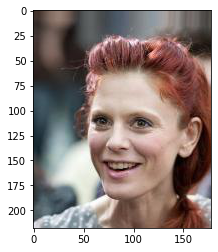

In [ ]:
img = load_img(img_)
plt.grid(False)
plt.imshow(img)
df_attr.loc[img_.split('/')[-1]][['Smiling','Male','Young']] #some attributes

In [ ]:
img.size

(178, 218)

In [ ]:
df_partition = pd.read_csv('/content/celeba-dataset/list_eval_partition.csv')
df_partition.head()

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [ ]:
# display counter by partition
# 0 -> TRAINING
# 1 -> VALIDATION
# 2 -> TEST
df_partition['partition'].value_counts().sort_index()

0    162770
1     19867
2     19962
Name: partition, dtype: int64

In [ ]:
# join the partition with the attributes
df_partition.set_index('image_id', inplace=True)
df_par_attr = df_partition.join(df_attr['Male'], how='inner')
df_par_attr = df_par_attr.join(df_attr['Smiling'], how='inner')
df_par_attr = df_par_attr.join(df_attr['Young'], how='inner')
df_par_attr.head()

,partition,Male,Smiling,Young
image_id,,,,
000001.jpg,0,0,1,1
000002.jpg,0,0,1,1
000003.jpg,0,1,0,1
000004.jpg,0,0,0,1
000005.jpg,0,0,0,1


In [ ]:
df_par_attr['partition'].value_counts()

0    162770
2     19962
1     19867
Name: partition, dtype: int64

In [ ]:
def load_reshape_img(img_name):
    img = load_img(img_name)
    x = img_to_array(img)/255.
    x = x.reshape((1,) + x.shape)

    return x

In [ ]:
df_train = df_par_attr[df_par_attr['partition']==0] ## train set
df_valid = df_par_attr[df_par_attr['partition']==1] ## valid set
df_test = df_par_attr[df_par_attr['partition']==2] ## test set


In [ ]:
df_train_gender = df_train.iloc[0:2000,:2]
df_valid_gender = df_valid.iloc[0:500,:2]
df_test_gender = df_test.iloc[0:400,:2]

In [ ]:
df_train_gender

,partition,Male
image_id,,
000001.jpg,0,0
000002.jpg,0,0
000003.jpg,0,1
000004.jpg,0,0
000005.jpg,0,0
...,...,...
001996.jpg,0,1
001997.jpg,0,0
001998.jpg,0,1


In [ ]:
df_train_gender['Male']

image_id
000001.jpg    0
000002.jpg    0
000003.jpg    1
000004.jpg    0
000005.jpg    0
             ..
001996.jpg    1
001997.jpg    0
001998.jpg    1
001999.jpg    1
002000.jpg    1
Name: Male, Length: 2000, dtype: int64

In [ ]:
x_ = np.array([load_reshape_img(images_folder + fname) for fname in df_train_gender.index])
X_train = x_.reshape(x_.shape[0], 218, 178, 3)

x_v = np.array([load_reshape_img(images_folder + fname) for fname in df_valid_gender.index])
X_valid = x_v.reshape(x_v.shape[0], 218, 178, 3)

x_t = np.array([load_reshape_img(images_folder + fname) for fname in df_test_gender.index])
X_test = x_t.reshape(x_t.shape[0], 218, 178, 3)

y_train = keras.utils.to_categorical(df_train_gender['Male'],2)
y_valid = keras.utils.to_categorical(df_valid_gender['Male'],2)
y_test = keras.utils.to_categorical(df_test_gender['Male'],2)

In [ ]:
X_train.shape

(2000, 218, 178, 3)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_valid = X_valid.reshape(X_valid .shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
y_train.shape

(2000, 2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=40,
    verbose=True,
    validation_data=(X_valid, y_valid)
)

[test_loss, test_acc] = model.evaluate(X_test, y_test)
print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

Epoch 1/40
32/32 [==============================] - 3s 65ms/step - loss: 52.8230 - accuracy: 0.4900 - val_loss: 6.7818 - val_accuracy: 0.4280
Epoch 2/40
32/32 [==============================] - 1s 46ms/step - loss: 2.2840 - accuracy: 0.5240 - val_loss: 0.6683 - val_accuracy: 0.5740
Epoch 3/40
32/32 [==============================] - 1s 44ms/step - loss: 0.8720 - accuracy: 0.5660 - val_loss: 1.5408 - val_accuracy: 0.3700
Epoch 4/40
32/32 [==============================] - 1s 44ms/step - loss: 0.7765 - accuracy: 0.5785 - val_loss: 0.6815 - val_accuracy: 0.5820
Epoch 5/40
32/32 [==============================] - 1s 45ms/step - loss: 0.6812 - accuracy: 0.5870 - val_loss: 0.6798 - val_accuracy: 0.5800
Epoch 6/40
32/32 [==============================] - 1s 45ms/step - loss: 0.6882 - accuracy: 0.5860 - val_loss: 0.6810 - val_accuracy: 0.5820
Epoch 7/40
32/32 [==============================] - 1s 44ms/step - loss: 0.6782 - accuracy: 0.5905 - val_loss: 0.6774 - val_accuracy: 0.5860
Epoch 8/40
3

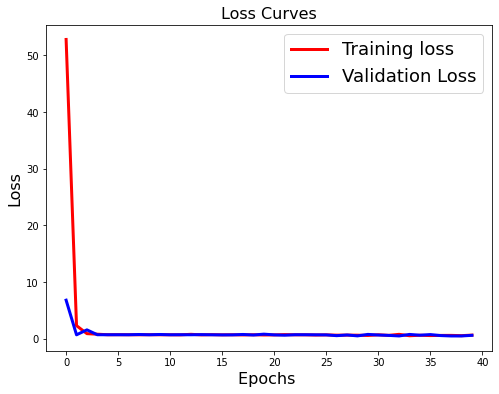

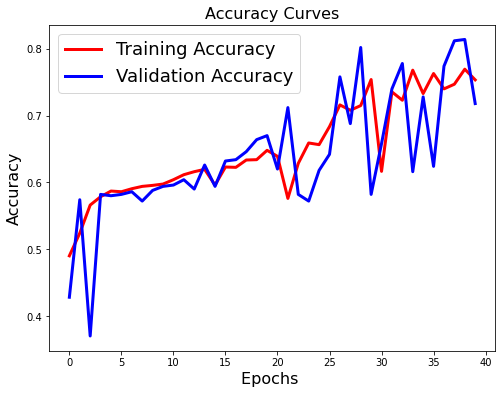

In [ ]:
def plot_history(history):
    #Plot the Loss Curves
    plt.figure(figsize=[8,6])

    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    plt.show()
    
    #Plot the Accuracy Curves
    plt.figure(figsize=[8,6])
    
    plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
    plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)
    
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.show()

plot_history(history)

#CNN

In [ ]:
x_ = np.array([load_reshape_img(images_folder + fname) for fname in df_train_gender.index])
X_train = x_.reshape(x_.shape[0], 218, 178, 3)

x_v = np.array([load_reshape_img(images_folder + fname) for fname in df_valid_gender.index])
X_valid = x_v.reshape(x_v.shape[0], 218, 178, 3)

x_t = np.array([load_reshape_img(images_folder + fname) for fname in df_test_gender.index])
X_test = x_t.reshape(x_t.shape[0], 218, 178, 3)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout



In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(128, (5,5), activation="relu", padding="same", input_shape=(218, 178, 3)))
model.add(tf.keras.layers.MaxPooling2D((3,3)))
# model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(BatchNormalization())
model.add(MaxPooling2D ((3, 3)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(BatchNormalization())
model.add(MaxPooling2D ((3, 3)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(BatchNormalization())
model.add(MaxPooling2D ((3, 3)))
model.add(Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2, activation="softmax"))

# compile model
opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# fit model
history = model.fit(
    X_train,
    y_train,
    epochs=40,
    batch_size=64,
    validation_data=(X_valid, y_valid),
    verbose=1
)

Epoch 1/40
32/32 [==============================] - 7s 199ms/step - loss: 0.6900 - accuracy: 0.5650 - val_loss: 0.6844 - val_accuracy: 0.6680
Epoch 2/40
32/32 [==============================] - 6s 185ms/step - loss: 0.6779 - accuracy: 0.5805 - val_loss: 0.6756 - val_accuracy: 0.6820
Epoch 3/40
32/32 [==============================] - 6s 186ms/step - loss: 0.6654 - accuracy: 0.6095 - val_loss: 0.6520 - val_accuracy: 0.6480
Epoch 4/40
32/32 [==============================] - 6s 186ms/step - loss: 0.6491 - accuracy: 0.6140 - val_loss: 0.6118 - val_accuracy: 0.7200
Epoch 5/40
32/32 [==============================] - 6s 188ms/step - loss: 0.6165 - accuracy: 0.6630 - val_loss: 0.5844 - val_accuracy: 0.6900
Epoch 6/40
32/32 [==============================] - 6s 188ms/step - loss: 0.6043 - accuracy: 0.6730 - val_loss: 0.5554 - val_accuracy: 0.7400
Epoch 7/40
32/32 [==============================] - 6s 188ms/step - loss: 0.5757 - accuracy: 0.7070 - val_loss: 0.5354 - val_accuracy: 0.7440
Epoch 

In [ ]:
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

13/13 [==============================] - 1s 49ms/step - loss: 0.2165 - accuracy: 0.9075
Evaluation result on Test Data : Loss = 0.21653984487056732, accuracy = 0.9075000286102295


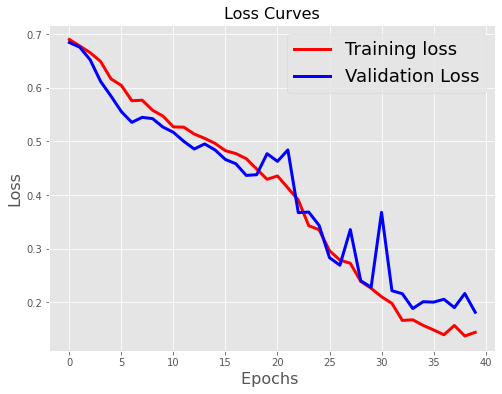

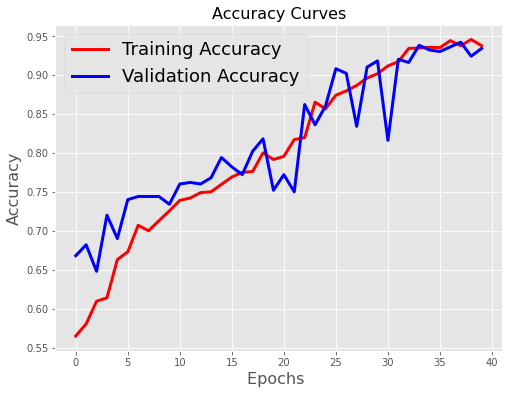

In [ ]:
def plot_history(history):
    #Plot the Loss Curves
    plt.figure(figsize=[8,6])

    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    plt.show()
    
    #Plot the Accuracy Curves
    plt.figure(figsize=[8,6])
    
    plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
    plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)
    
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.show()

plot_history(history)